In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
plt.style.use('fivethirtyeight')

In [8]:
df = pd.read_csv('cardata1.csv')
df.drop('Unnamed: 0', axis=1, inplace =True)
df['age'] = df['Year of Manufacture'].apply(lambda x: 2022-float(x))

In [9]:
# Extract kenyan used cars
filt_foreign = df['Condition']=='Foreign Used'
df=df.loc[filt_foreign]
df.shape

(13491, 13)

In [6]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,age
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,6.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,7.0
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,8.0
10,Foreign Used,Nissan,X-Trail,2015.0,Black,Automatic,87000.0,2500000.0,Tue,VIP TOP+,2022-08-02 11:19:24,14.0,7.0
12,Foreign Used,Toyota,Vitz,2014.0,Purple,Automatic,76000.0,885000.0,Wed,3X Diamond,2022-07-27 18:28:08,19.0,8.0


# Basic Data Exploration

In [10]:
df.describe()

,Year of Manufacture,Mileage,selling_price,listing_duration,age
count,13491.000000,9.311000e+03,1.347700e+04,13491.000000,13491.000000
mean,2014.602105,7.767847e+04,2.282620e+06,56.152546,7.397895
std,1.073161,6.278300e+04,2.047656e+06,52.750889,1.073161
min,1991.000000,0.000000e+00,7.000000e+04,13.000000,0.000000
25%,2014.000000,5.610000e+04,1.118000e+06,25.000000,7.000000
50%,2015.000000,7.158600e+04,1.700000e+06,38.000000,7.000000
75%,2015.000000,8.740800e+04,2.600000e+06,65.000000,8.000000
max,2022.000000,1.240000e+06,4.500000e+07,507.000000,31.000000


From the descrtiption above we see that:
    - The average age of a car is 8.4 years, average mileage is 90K, average price is 2.2M & the average duration is has been on sale is 53 days

In [11]:
# Filter out the major outliers;
min_sp= df['selling_price'].quantile(0.0001)
max_sp = df['selling_price'].quantile(0.999)
# max_mileage = df['Mileage'].quantile(0.999)
filt1= (df['selling_price']>=min_sp) & (df['selling_price']<=max_sp) 
df


,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,age
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,6.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,7.0
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,8.0
10,Foreign Used,Nissan,X-Trail,2015.0,Black,Automatic,87000.0,2500000.0,Tue,VIP TOP+,2022-08-02 11:19:24,14.0,7.0
12,Foreign Used,Toyota,Vitz,2014.0,Purple,Automatic,76000.0,885000.0,Wed,3X Diamond,2022-07-27 18:28:08,19.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17773,Foreign Used,Audi,A4,2014.0,White,Automatic,63000.0,880000.0,Fri,{},2022-07-22 07:47:08,25.0,8.0
17774,Foreign Used,Toyota,Hilux,2014.0,Gray,Automatic,77900.0,1150000.0,Fri,{},2021-12-10 05:07:11,249.0,8.0
17775,Foreign Used,Toyota,Hilux,2014.0,Red,Automatic,70000.0,1050000.0,Sat,{},2022-07-09 11:13:47,38.0,8.0
17778,Foreign Used,Honda,Fit Shuttle,2015.0,Red,CVT,37746.0,1600000.0,Tue,{},2022-04-05 18:11:49,132.0,7.0


In [12]:
df.describe()


,Year of Manufacture,Mileage,selling_price,listing_duration,age
count,13491.000000,9.311000e+03,1.347700e+04,13491.000000,13491.000000
mean,2014.602105,7.767847e+04,2.282620e+06,56.152546,7.397895
std,1.073161,6.278300e+04,2.047656e+06,52.750889,1.073161
min,1991.000000,0.000000e+00,7.000000e+04,13.000000,0.000000
25%,2014.000000,5.610000e+04,1.118000e+06,25.000000,7.000000
50%,2015.000000,7.158600e+04,1.700000e+06,38.000000,7.000000
75%,2015.000000,8.740800e+04,2.600000e+06,65.000000,8.000000
max,2022.000000,1.240000e+06,4.500000e+07,507.000000,31.000000


Mean Price = 2.28M
Mean Mileage = 78K
mean age = 7.3 years
mean duration = 56 days






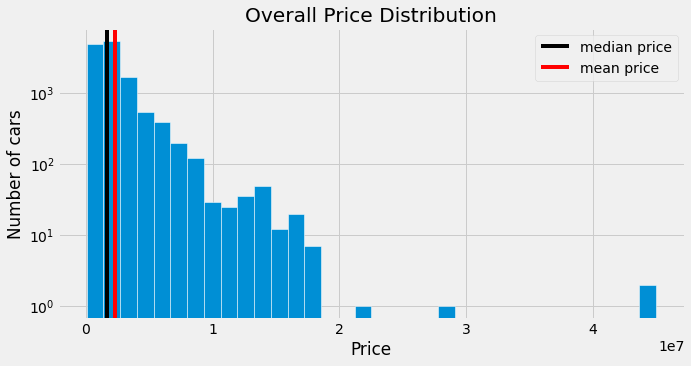

In [13]:
# Price distribution
values = df['selling_price']

plt.title('Overall Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
median_price = df['selling_price'].median()
mean_price = df['selling_price'].mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

#Plot the hist
plt.legend()
plt.hist(values, bins=34, log=True, edgecolor='white')
plt.show()

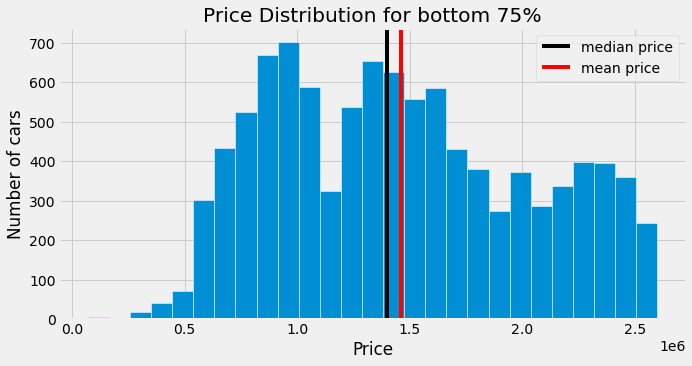

In [14]:
#Price distrinution for cars less than 75th percentile

pct75 = df['selling_price'].quantile(0.75)
filt75 = df['selling_price']<=pct75
values = df.loc[filt75]['selling_price']

plt.title('Price Distribution for bottom 75%')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
# median_price = df['selling_price'].median()
median_price = values.median()
# mean_price = df['selling_price'].mean()
mean_price = values.mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

plt.legend()

#Plot the hist
plt.hist(values, bins=27, edgecolor='white')
plt.show()

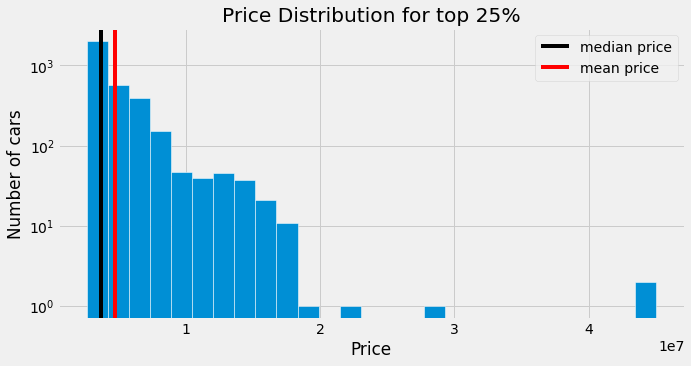

In [15]:
pct75 = df['selling_price'].quantile(0.75)
filt75 = df['selling_price']>pct75
values = df.loc[filt75]['selling_price']

plt.title('Price Distribution for top 25%')
plt.xlabel('Price')
plt.ylabel('Number of cars')

#Add the median & mean lines
# median_price = df['selling_price'].median()
median_price = values.median()
# mean_price = df['selling_price'].mean()
mean_price = values.mean()
plt.axvline(median_price, color='black', label= 'median price')
plt.axvline(mean_price, color='red', label= 'mean price')

#Plot the hist
plt.legend()
plt.hist(values, bins=27,log=True,  edgecolor='white')
plt.show()

Other Distibutions

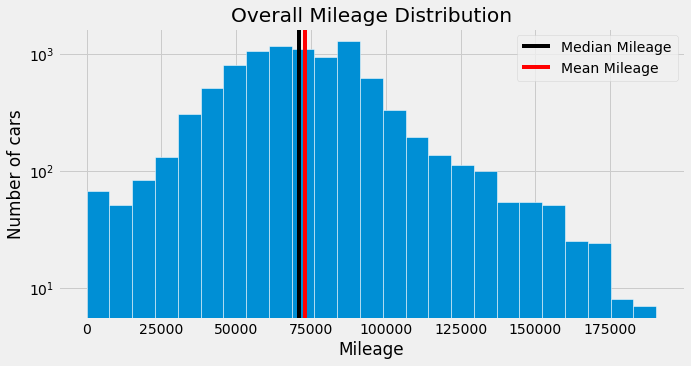

In [16]:
# Mileage
pct99 = df['Mileage'].quantile(0.99)
filt_mil = df['Mileage']<=pct99
values = df.loc[filt_mil]['Mileage']

plt.title('Overall Mileage Distribution')
plt.xlabel('Mileage')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Mileage')
plt.axvline(mean_mil, color='red', label= 'Mean Mileage')

#Plot the hist
plt.legend()
plt.hist(values, bins=25, log=True, edgecolor='white')
plt.show()

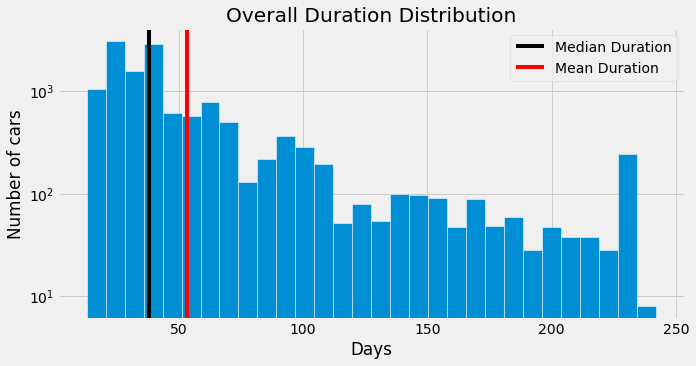

In [17]:
# duration distribution

pct99 = df['listing_duration'].quantile(0.99)
filt_mil = df['listing_duration']<=pct99
values = df.loc[filt_mil]['listing_duration']

# values = df['listing_duration']

plt.title('Overall Duration Distribution')
plt.xlabel('Days')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Duration')
plt.axvline(mean_mil, color='red', label= 'Mean Duration')

#Plot the hist
plt.legend()
plt.hist(values, bins=30,log=True,  edgecolor='white')
plt.show()

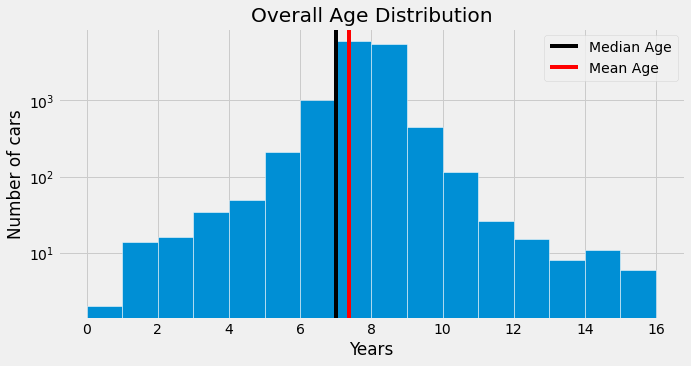

In [19]:
# Age

pct99 = df['age'].quantile(0.999)
filt_mil = df['age']<=pct99
values = df.loc[filt_mil]['age']

# values = df['listing_duration']

plt.title('Overall Age Distribution')
plt.xlabel('Years')
plt.ylabel('Number of cars')

# Add the median & mean lines
median_mil = values.median()
mean_mil = values.mean()
plt.axvline(median_mil, color='black', label= 'Median Age')
plt.axvline(mean_mil, color='red', label= 'Mean Age')

#Plot the hist
plt.legend()
plt.hist(values, bins=16,log=True,  edgecolor='white')
plt.show()

# Checking Condition

In [20]:
df_cdn= df.Condition.value_counts().rename_axis('cdn').to_frame('counts').reset_index()
df_cdn

,cdn,counts
0,Foreign Used,13491


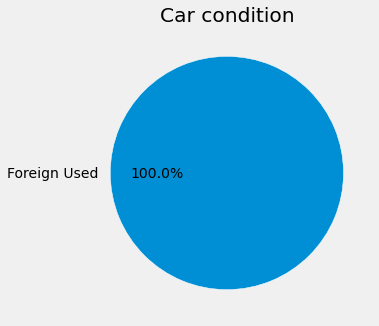

In [21]:
data= df_cdn['counts']
labels = df_cdn['cdn']
plt.title('Car condition')
plt.pie(data, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor':'white'})
plt.show()

# Makes & Models

In [22]:
df_makes= df.Make.value_counts().rename_axis('Make').to_frame('counts').reset_index()

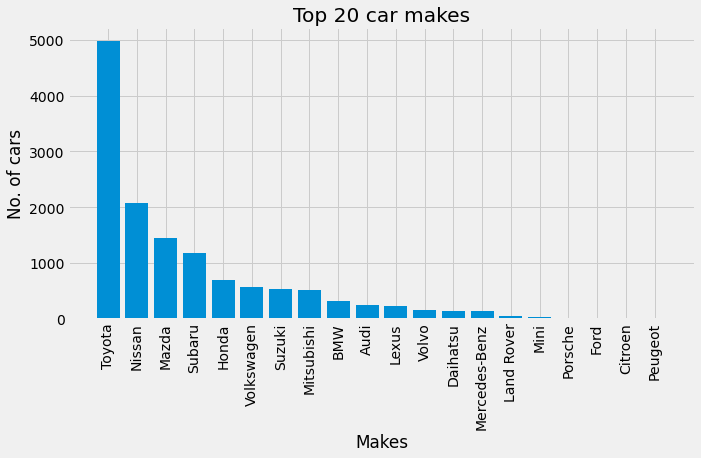

In [23]:
x=df_makes[:20]['Make']
y=df_makes[:20]['counts']

plt.xlabel('Makes')
plt.ylabel('No. of cars')
plt.title('Top 20 car makes')

# plt.yscale('log')
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

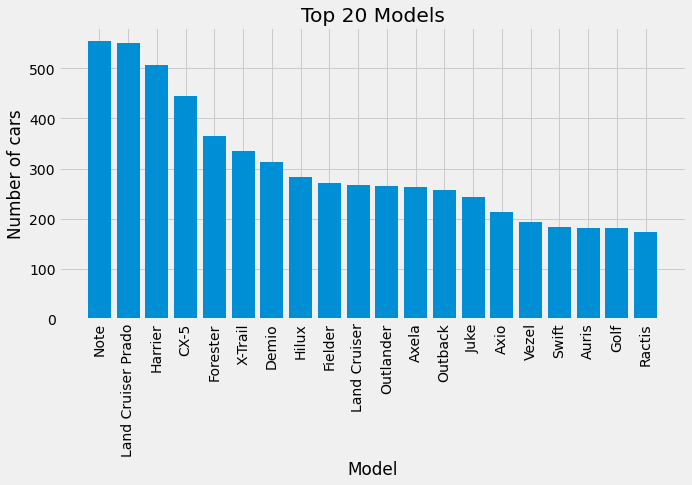

<Figure size 1296x1152 with 0 Axes>

In [24]:
#using barh to make a horizontal bar chart
df_models= df.Model.value_counts().rename_axis('Model').to_frame('Counts').reset_index()
df_models


x=df_models[:20]['Model']
y=df_models[:20]['Counts']

plt.xlabel('Model')
plt.ylabel('Number of cars')
plt.title('Top 20 Models')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.figure(figsize=(18, 16))
plt.show()

# Makes: Price, age, mileage, duration Analysis

In [25]:
df.shape

(13491, 13)

In [26]:
# makes = df.

In [27]:
makes_grp = df.groupby('Make')

In [28]:
df_car_make=makes_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_14876\3455017920.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_make=makes_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()


In [29]:
df_car_make

,listing_duration,age,Mileage,selling_price
Make,,,,
Alfa Romeo,65.000000,10.000000,NaN,2.749286e+06
Audi,48.891892,7.590734,78978.290503,2.351900e+06
BMW,61.149390,7.585366,69888.523404,2.386607e+06
Bentley,65.000000,7.000000,40000.000000,2.299999e+06
Cadillac,48.000000,13.000000,30000.000000,1.950000e+06
Chevrolet,51.500000,7.500000,NaN,1.150000e+06
Citroen,55.000000,7.666667,91104.181818,2.672500e+06
Daihatsu,35.710345,7.406897,77578.444444,2.430414e+06
Fiat,13.000000,8.000000,NaN,5.525000e+06


In [30]:
#create a df from valuecounts
# df_makes= df.Make.value_counts().rename_axis('Make').to_frame('counts').reset_index()
df_makes.set_index('Make', inplace=True)

In [31]:
df_makes.head()

,counts
Make,
Toyota,4971
Nissan,2077
Mazda,1458
Subaru,1191
Honda,694


In [32]:
df_makes=df_makes.join(df_car_make)
df_makes

,counts,listing_duration,age,Mileage,selling_price
Make,,,,,
Toyota,4971,58.816737,7.315631,74640.332771,2.314184e+06
Nissan,2077,54.926818,7.482908,81385.788660,2.253605e+06
Mazda,1458,53.497942,7.390947,79759.820591,2.158045e+06
Subaru,1191,58.154492,7.442485,87546.957993,2.247552e+06
Honda,694,52.074928,7.399135,73885.648069,2.207349e+06
Volkswagen,576,58.373264,7.475694,72339.494792,2.475814e+06
Suzuki,539,55.350649,7.423006,87163.358757,2.152230e+06
Mitsubishi,522,61.626437,7.318008,76702.008403,2.153588e+06
BMW,328,61.149390,7.585366,69888.523404,2.386607e+06


In [33]:
# plots for average prices
df_makes.reset_index(inplace=True)

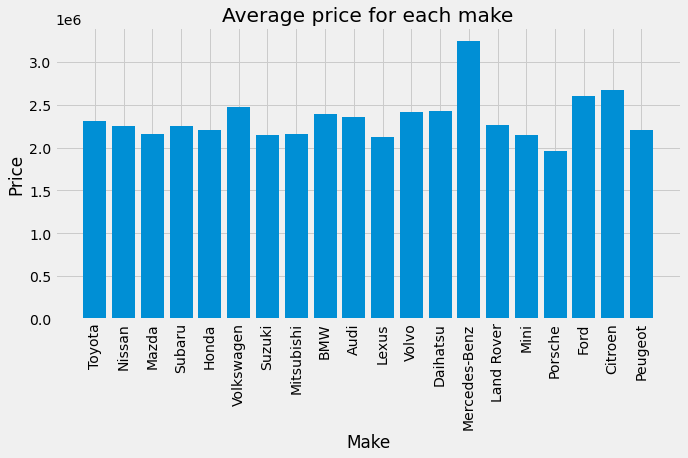

In [34]:
# plots for average prices
x= df_makes[:20]['Make']
y=df_makes[:20]['selling_price']

plt.title('Average price for each make')
plt.xlabel('Make')
plt.ylabel('Price')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

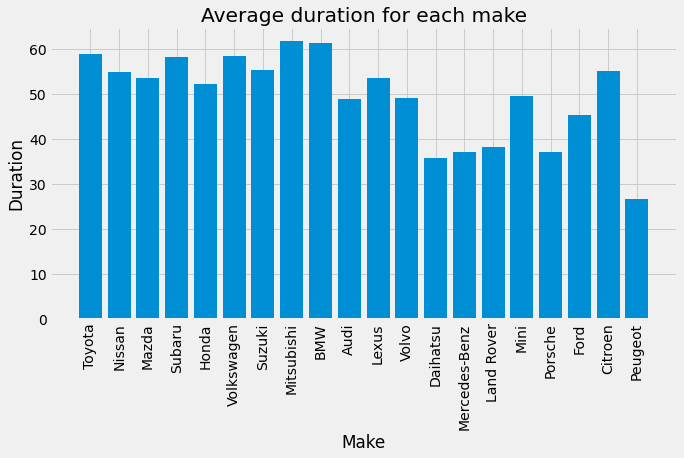

In [35]:
# plots for duration prices
x= df_makes[:20]['Make']
y=df_makes[:20]['listing_duration']

plt.title('Average duration for each make')
plt.xlabel('Make')
plt.ylabel('Duration')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

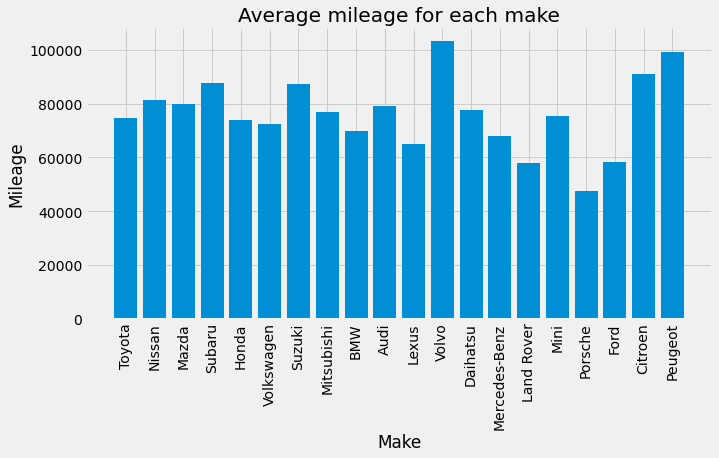

In [36]:
# plots for Mileage prices
x= df_makes[:20]['Make']
y=df_makes[:20]['Mileage']

plt.title('Average mileage for each make')
plt.xlabel('Make')
plt.ylabel('Mileage')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

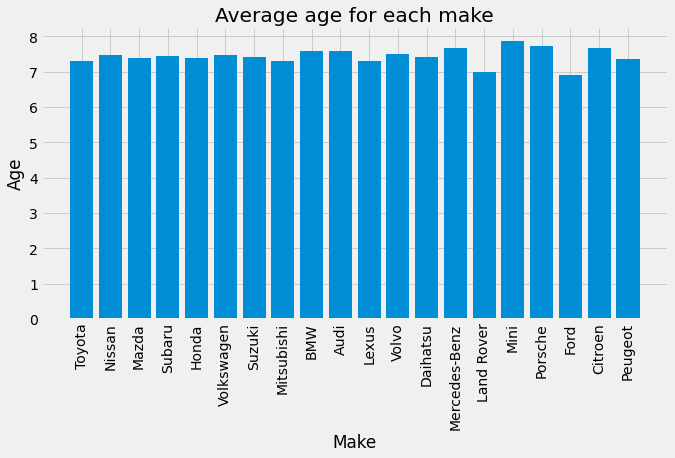

In [37]:
# plots for mean age
x= df_makes[:20]['Make']
y=df_makes[:20]['age']

plt.title('Average age for each make')
plt.xlabel('Make')
plt.ylabel('Age')

plt.xticks(rotation=90)
plt.bar(x, y)

plt.show()

# Models: Price, age, mileage & duration analysis

In [38]:
models_grp = df.groupby('Model')

In [39]:
df_car_models=models_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()
df_car_models['median_price'] = models_grp['selling_price'].mean()

C:\Users\Brian\AppData\Local\Temp\ipykernel_14876\1379814304.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_car_models=models_grp['listing_duration','age', 'Mileage', 'selling_price'].mean()


In [40]:
df_car_models

,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,
1.8,41.000000,7.000000,55483.000000,1.097500e+06,1.097500e+06
100,70.000000,8.000000,87272.000000,1.250000e+06,1.250000e+06
116i,78.100000,7.583333,69317.617021,2.194250e+06,2.194250e+06
120i,21.333333,7.333333,65464.000000,2.756667e+06,2.756667e+06
145,66.000000,22.000000,NaN,2.800000e+06,2.800000e+06
...,...,...,...,...,...
XC90,22.000000,8.000000,NaN,1.866000e+06,1.866000e+06
XF,44.800000,8.000000,38486.000000,2.146000e+06,2.146000e+06
XV,55.484848,7.515152,80734.696203,2.137318e+06,2.137318e+06


In [41]:
#creating df from valuecounts
df_models= df.Model.value_counts().rename_axis('Model').to_frame('Counts').reset_index()
df_models.set_index('Model', inplace=True)

In [42]:
# using join to merge two dataframes
df_models=df_models.join(df_car_models)

In [43]:
df_car_models.head()

,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,
1.8,41.000000,7.000000,55483.000000,1.097500e+06,1.097500e+06
100,70.000000,8.000000,87272.000000,1.250000e+06,1.250000e+06
116i,78.100000,7.583333,69317.617021,2.194250e+06,2.194250e+06
120i,21.333333,7.333333,65464.000000,2.756667e+06,2.756667e+06
145,66.000000,22.000000,NaN,2.800000e+06,2.800000e+06


In [44]:
df_models

,Counts,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,,
Note,554,47.411552,7.243682,83506.721675,2.211554e+06,2.211554e+06
Land Cruiser Prado,551,64.105263,6.969147,63665.326877,2.435011e+06,2.435011e+06
Harrier,506,58.685771,7.183794,74750.167568,2.342756e+06,2.342756e+06
CX-5,445,54.925843,7.397753,76656.852308,2.266471e+06,2.266471e+06
Forester,364,50.324176,7.428571,75306.700375,2.362258e+06,2.362258e+06
...,...,...,...,...,...,...
CLS,1,35.000000,8.000000,105000.000000,1.690000e+07,1.690000e+07
Captiva,1,78.000000,7.000000,NaN,1.200000e+06,1.200000e+06
100,1,70.000000,8.000000,87272.000000,1.250000e+06,1.250000e+06


In [45]:
df_models.head()

,Counts,listing_duration,age,Mileage,selling_price,median_price
Model,,,,,,
Note,554,47.411552,7.243682,83506.721675,2.211554e+06,2.211554e+06
Land Cruiser Prado,551,64.105263,6.969147,63665.326877,2.435011e+06,2.435011e+06
Harrier,506,58.685771,7.183794,74750.167568,2.342756e+06,2.342756e+06
CX-5,445,54.925843,7.397753,76656.852308,2.266471e+06,2.266471e+06
Forester,364,50.324176,7.428571,75306.700375,2.362258e+06,2.362258e+06


In [46]:
df_models.reset_index(inplace=True)

In [47]:
def plot_model_bars(parameter):
    x= df_models[:30]['Model']
    y=df_models[:30][parameter]

    plt.title(f'Average {parameter} for each model')
    plt.xlabel('Model')
    plt.ylabel(parameter)

    plt.xticks(rotation=90)
    plt.bar(x, y)

    plt.show()

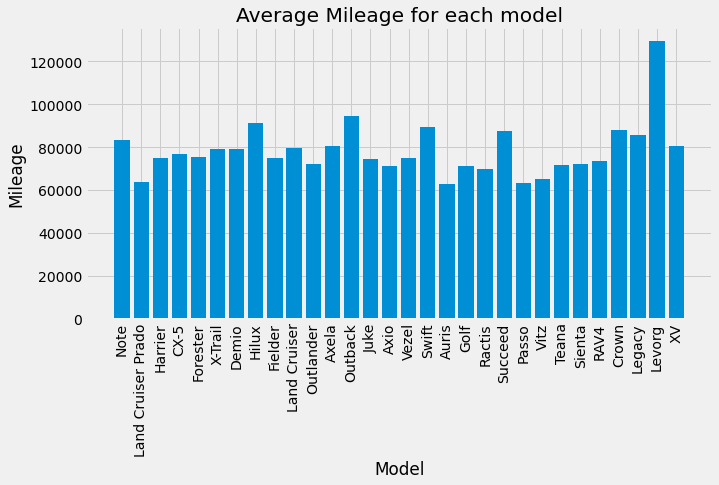

In [48]:
plot_model_bars('Mileage')

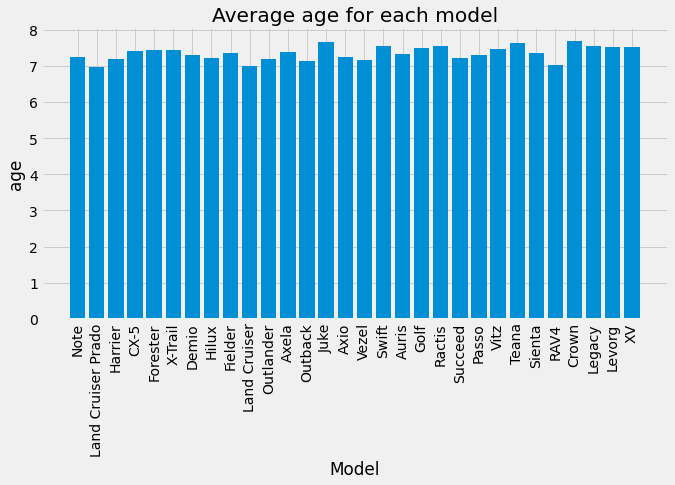

In [49]:
plot_model_bars('age')

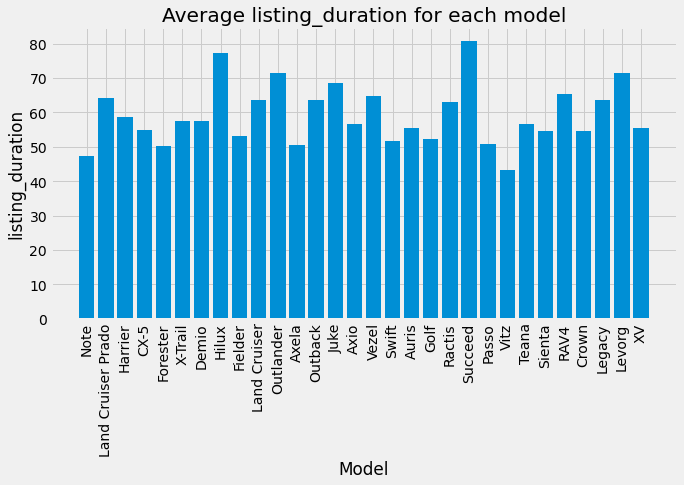

In [50]:
plot_model_bars('listing_duration')

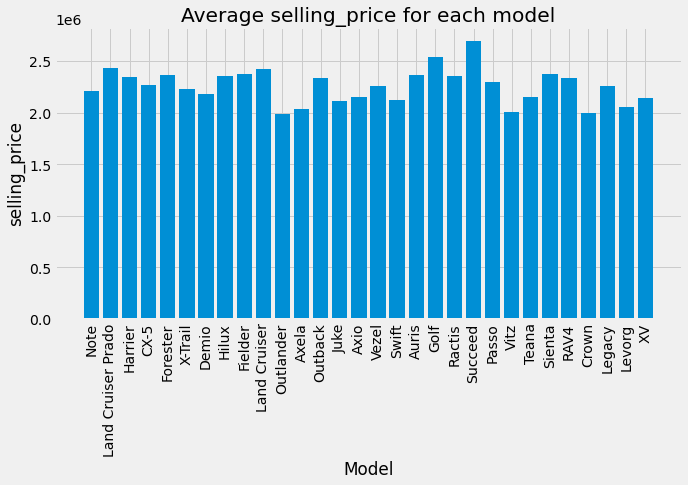

In [51]:
plot_model_bars('selling_price')

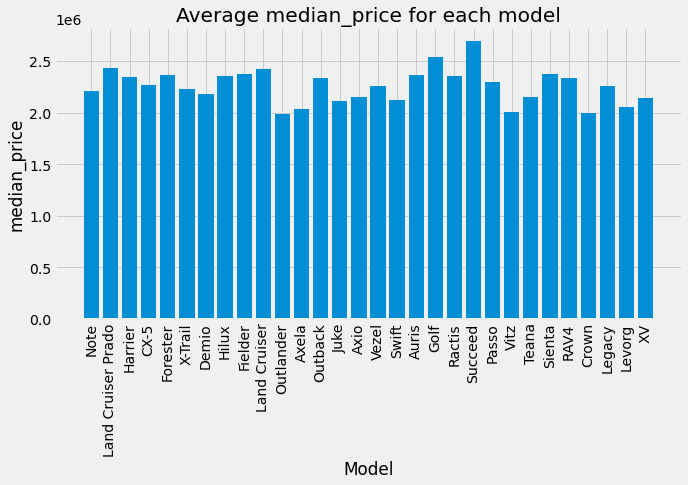

In [52]:
plot_model_bars('median_price')

In [55]:
filt_note = df['Model']=='Axio'
df.loc[filt_note]['selling_price'].min()

390000.0